In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
train = pd.read_csv('../Wikipedia/train_1.csv').fillna(0)

#train.dropna(axis=0)

#Dropping Page Column
columnnames = train.columns.values
train = train.drop('Page',axis = 1)
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
train.iloc[13890:13891]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
13890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [4]:
#Converting dataframe into numpy array
sample = train.iloc[13890:13891]
series = np.array(sample)
series = series.flatten()
series = np.log1p(series)
print(series.shape)

(550,)


In [5]:
#Split Train and Test Data
train_size = 441
test_size = len(series) - train_size
train, test = series[0:train_size], series[train_size:len(series)]
print(len(train), len(test))

441 109


In [6]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = train
# choose a number of time steps
n_steps = 7
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0.] 0.0
[

In [7]:
# CNN Model
from keras.models import Model, Sequential
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Input
import numpy as np

C:\Users\deepa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [9]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'], )

In [10]:
# fit model
model.fit(X, y, epochs=100, batch_size=100, verbose=0)

#Evaluate
model.evaluate(X, y, batch_size=100, verbose=1)

434/434 [==============================] - 0s 92us/step


[0.10339594285823576, 0.6728110554100182]

In [11]:
# Now let's predict the page hits from day 442 to 550 and compare it with test
feed = train[434:442]
for i in range(len(test)) :
    x_input = feed[i:7+i]
    x_input = x_input.reshape((1, n_steps, n_features))
    output = model.predict(x_input, batch_size=100)
    #output = np.around(output)
    feed = np.append(feed,output)
    

In [12]:
feed[7:].shape

(109,)

In [13]:
test.shape

(109,)

In [14]:
test = np.around(np.expm1(test))
pred = np.around(np.expm1(feed[7:]))

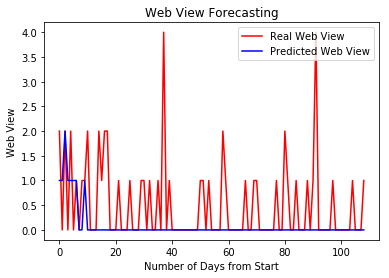

In [15]:
#Visualising Result of  Test
plt.figure
plt.plot(test, color = 'red', label = 'Real Web View')
plt.plot(pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [16]:
test

array([2., 0., 2., 0., 2., 0., 1., 0., 1., 1., 2., 0., 0., 0., 2., 1., 2.,
       2., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 4., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 4., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1.])

In [17]:
pred

array([1., 1., 2., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [21]:
#setting values 

pred = np.around(pred)
final = np.squeeze(pred)
test = np.around(test)
actual = np.squeeze(test)
#setting columns dates


col = columnnames[441:550]

#setting all these in data frame
pred_views = pd.DataFrame(np.reshape(final, (1,len(final))),columns = col)
actual_views = pd.DataFrame(np.reshape(actual, (1,len(actual))),columns = col)


In [20]:
pred_views

,2016-09-13,2016-09-14,2016-09-15,2016-09-16,2016-09-17,2016-09-18,2016-09-19,2016-09-20,2016-09-21,2016-09-22,...,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30
0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
actual_views

,2016-09-13,2016-09-14,2016-09-15,2016-09-16,2016-09-17,2016-09-18,2016-09-19,2016-09-20,2016-09-21,2016-09-22,...,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30
0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
